In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
X = data[['X_1', 'X_2']]
y = data.Y

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

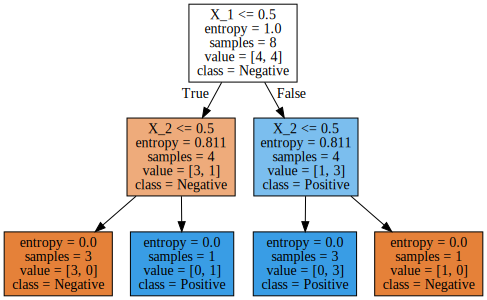

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [10]:
# 2.2
import math
def entropy_calculate(n1, n2):
    N = n1 + n2
    prob1 = n1 / N
    prob2 = n2 / N
    log_prob1 = 0 if n1 == 0 else math.log2(prob1)
    log_prob2 = 0 if n2 == 0 else math.log2(prob2)
    return(-1 * prob1 * log_prob1 - prob2 * log_prob2)

In [11]:
# start_entropy
start_entropy = entropy_calculate(4, 6)
sherstist_entropy_more_half = entropy_calculate(4, 5)
sherstist_entropy_less_half = entropy_calculate(0, 1)
gav_entropy_more_half = entropy_calculate(4, 1)
gav_entropy_less_half = entropy_calculate(0, 5)
tree_entropy_more_half = entropy_calculate(0, 6)
tree_entropy_less_half = entropy_calculate(6, 0)

In [12]:
entropy_calculate(0, 6)

-0.0

In [13]:
gav_entropy_more_half

0.7219280948873623

In [14]:
def IG_calculate(n1, n2, start_entropy, entropy_more_half, entropy_less_half):
    N = n1 + n2
    prob1 = n1 / N
    prob2 = n2 / N
    return(start_entropy - (prob1 * entropy_more_half + prob2 * entropy_less_half))

start_entropy = entropy_calculate(4, 6)
sherstist_entropy_more_half = entropy_calculate(4, 5)
sherstist_entropy_less_half = entropy_calculate(0, 1)
gav_entropy_more_half = entropy_calculate(4, 1)
gav_entropy_less_half = entropy_calculate(0, 5)
tree_entropy_more_half = entropy_calculate(0, 6)
tree_entropy_less_half = entropy_calculate(6, 0)

sherst_IG = round(IG_calculate(9, 1, start_entropy, sherstist_entropy_more_half, sherstist_entropy_less_half), 2)
gav_IG = round(IG_calculate(5, 5, start_entropy, gav_entropy_more_half, gav_entropy_less_half), 2)
tree_IG = round(IG_calculate(6, 4, start_entropy, tree_entropy_more_half, tree_entropy_less_half), 2)
print(sherst_IG, gav_IG, tree_IG)

0.08 0.61 0.97


## Titanic

In [15]:
df = pd.read_csv('titanic_train.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isna().sum() / df.shape[1]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            14.750000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          57.250000
Embarked        0.166667
dtype: float64

In [18]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df.Survived

In [19]:
X = pd.get_dummies(X)

In [20]:
X = X.fillna({'Age': X.Age.median()})

In [21]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [23]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

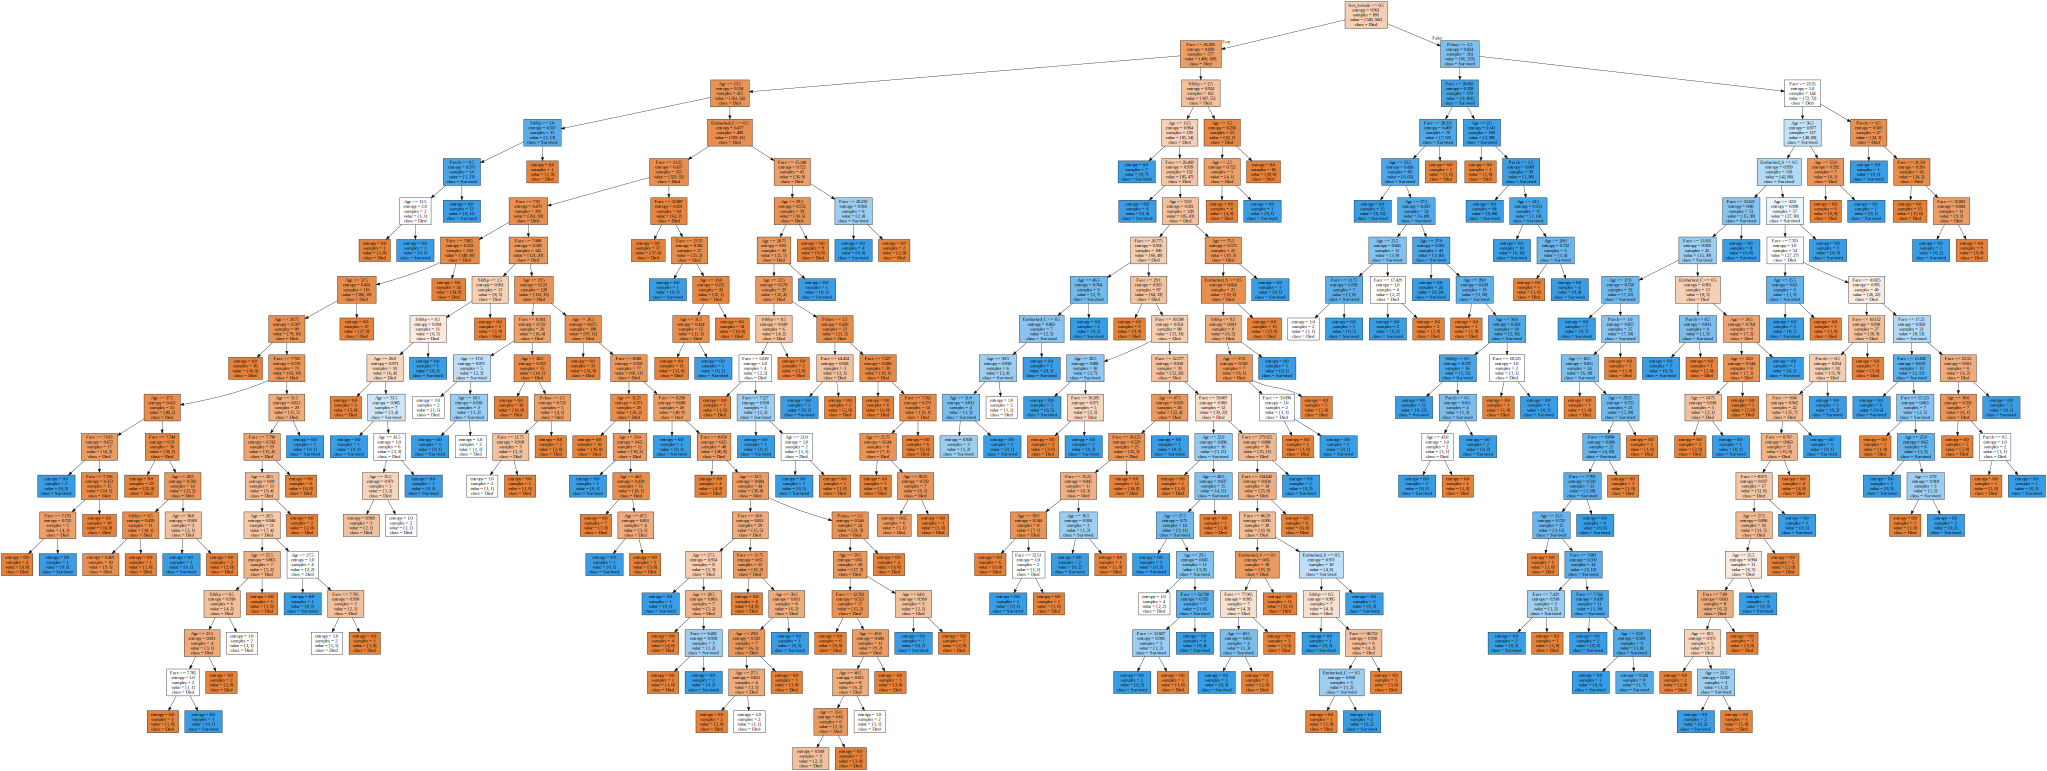

In [24]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'], 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.shape

(596, 10)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
clf.score(X_test, y_test)

0.7762711864406779

In [30]:
max_depths = range(1, 100)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores_data = pd.DataFrame()

for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [33]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.800303


In [34]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


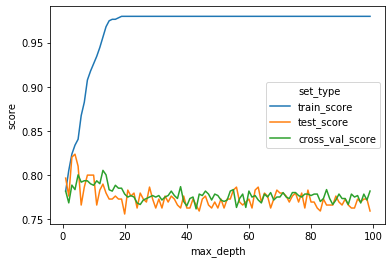

In [35]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type');

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [38]:
# home
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
test_df.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [39]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [40]:
df.Вид = pd.factorize(df.Вид)[0]
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,0
1,20,24.0,1,0,0,0
2,34,40.8,1,1,0,0
3,26,31.2,1,1,0,0
4,16,19.2,1,1,0,0


In [41]:
X = df.drop(['Вид'], axis=1)
y = df.Вид

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [44]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.800303
0,6,0.867450,0.766102,0.792026
0,7,0.882550,0.786441,0.793636
0,8,0.907718,0.800000,0.793551
0,9,0.917785,0.800000,0.790162
0,10,0.926174,0.800000,0.788481


In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
test = pd.read_json('df_24.txt')

In [47]:
df.Вид = pd.factorize(df.Вид)[0]
X = df.drop(['Вид'], axis=1)
y = df.Вид
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)
sum(clf.predict(test) == 0)

40

In [48]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [49]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [50]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [51]:
grid_search_cv_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [52]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [53]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [54]:
best_clf = grid_search_cv_clf.best_estimator_

In [55]:
best_clf.score(X_test, y_test)

1.0

In [56]:
from sklearn.metrics import precision_score, recall_score

In [57]:
precision_score(y_test, best_clf.predict(X_test))

1.0

In [58]:
recall_score(y_test, best_clf.predict(X_test))

1.0

In [62]:
best_clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [63]:
test_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
test_df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [64]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [66]:
X = test_df[['sex', 'exang']]
y = test_df.num

In [67]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

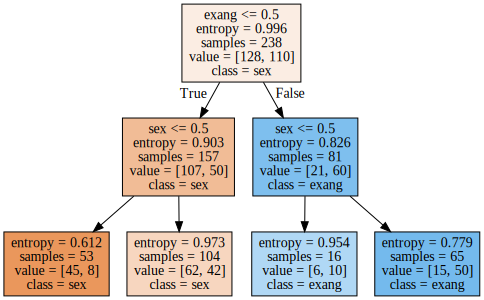

In [74]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                    feature_names=list(X), 
                                    class_names=['sex', 'exang'], 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [86]:
clf.tree_.impurity[1]

0.9027113410339267

In [78]:
clf.tree_.impurity

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [85]:
clf.tree_.n_node_samples

array([238, 157,  53, 104,  81,  16,  65])

In [89]:
clf.tree_.n_node_samples[1] / 238 * clf.tree_.impurity[1] + clf.tree_.n_node_samples[4] / 238 * clf.tree_.impurity[4]

0.8764765931139329

In [91]:
clf.tree_.impurity[0] - (clf.tree_.n_node_samples[1] / 238 * clf.tree_.impurity[1] + clf.tree_.n_node_samples[4] / 238 * clf.tree_.impurity[4])

0.11939340343891591

In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

param_grid = [
  {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}
 ]

clf = DecisionTreeClassifier()
dt = GridSearchCV(clf, param_grid)

In [98]:
dt.estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
import sklearn
sklearn.__version__

'0.21.2'

In [101]:
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [105]:
df.drop(['song'], axis = 1)

,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
5,2007,gangstarr,Hip-Hop,"[Smiley] Aiyyo I got the dimes that I get, I g...",1413,26,0,0,2
6,2006,abba,Pop,There's a gentleness to everything you do\nAnd...,714,0,0,0,0
7,2006,abba,Pop,Every day in the morning on her way to the off...,1263,5,0,0,1
8,2007,blind-guardian,Metal,Don't break the circle\nDon't break the circle...,1392,3,0,0,0
9,2001,abba,Pop,"I've seen you twice, in a short time\nOnly a w...",1986,14,0,0,3


In [ ]:
df = 